## 1. Introduction

### Background

Analyze the online taxi fares between Lyft and Uber using a linear regression model. Since no one has yet analyzed the pricing criteria between these two taxi services using a linear regression model, I decided to make a prediction estimate of the fares for both services.

### Problem Statement

The goal is to build a machine learning model that can perform an analysis and develop a simple linear regression model based on the provided dataset. This model will evaluate how the fares of these taxis vary with all the created features.

The model will be evaluated using the Mean Absolute Error (MAE) loss function.

## 2.Import Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import phik
import pickle
import json
import warnings


from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from phik.report import plot_correlation_matrix
from sklearn.linear_model import LinearRegression

## 3.Data Loading

The dataset used for this linear regression model comprises Uber and Lyft data sourced from Kaggle.com.

sourse : https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma

In [3]:
# loading data
data = pd.read_csv('rideshare_kaggle.csv')
data


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [4]:
# cek info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

From the data summary above, the dataset contains:

**RangeIndex:** 693,071

**Columns:** 57

In [5]:
# cek duplikasi data
data.duplicated().sum()

0

There are no duplicate records in the dataset.

In [7]:
# cek missing value
data.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [8]:
# cek statistik deskriptif data
data.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


## 4.Exploratory Data Analysis (EDA)

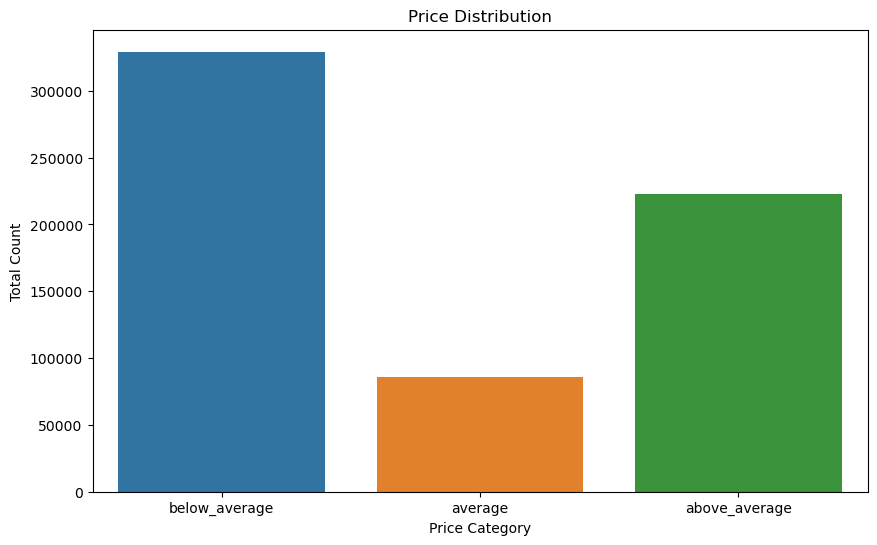

In [9]:
# Calculating the average price
average_price = data['price'].mean()

# Setting a threshold for upper_price and lower_price (e.g., 10% of the average)
threshold = 0.1 * average_price

# Calculating upper_price, average_price, and lower_price
upper_price = average_price + threshold
lower_price = average_price - threshold

# Adding a 'price_category' column based on conditions
data['price_category'] = pd.cut(data['price'], bins=[-np.inf, lower_price, upper_price, np.inf], labels=['below_average', 'average', 'above_average'])

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='price_category', data=data, order=['below_average', 'average', 'above_average'])
plt.title('Price Distribution')
plt.xlabel('Price Category')
plt.ylabel('Total Count')
plt.show()

From the bar chart above, it can be seen that the distribution of prices in the `below_average` category is larger.

<function matplotlib.pyplot.show(close=None, block=None)>

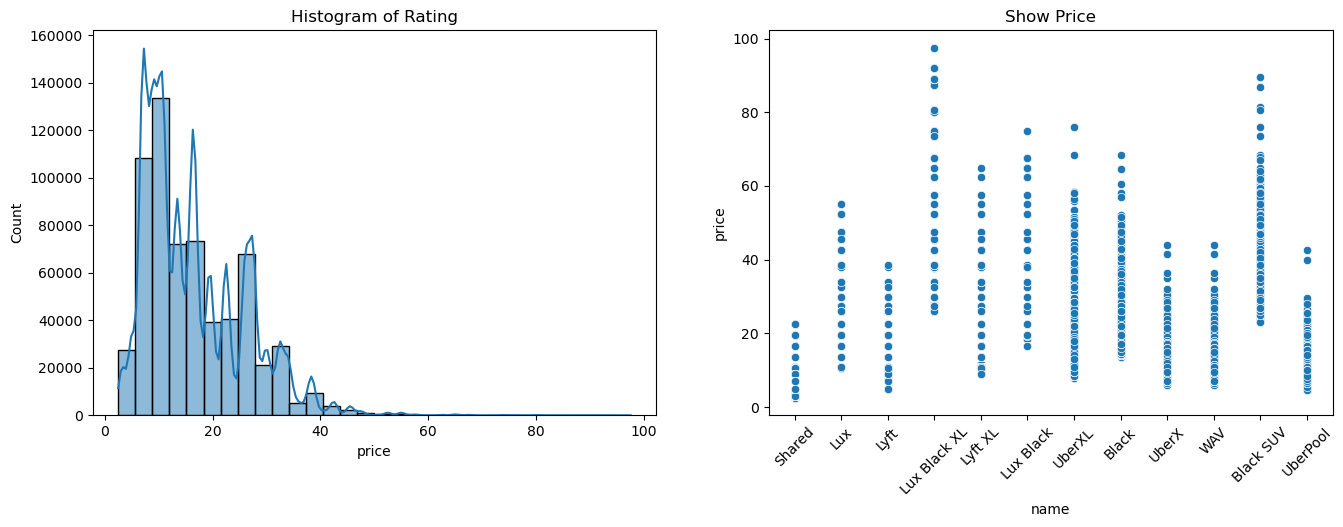

In [10]:
#create histogram and scatter plot

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(data['price'], kde=True, bins = 30)
plt.title('Histogram of Rating')

plt.subplot(1,2,2)
sns.scatterplot(x = 'name', y = 'price', data = data)
plt.title('Show Price')
plt.xticks(rotation=45)
plt.show

From the bar chart above, it can be concluded that the price distribution tends to fall between 0-20 and is not normally distributed. Additionally, the scatter plot reveals the group names that have the highest and lowest average prices.

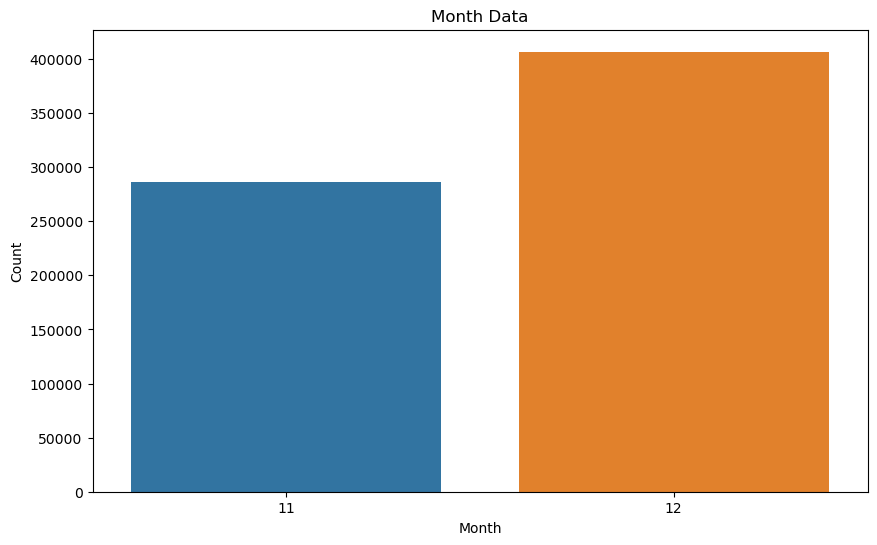

In [11]:
# Create Bar chart
calculate = data.groupby('month')['month'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=calculate.index, y=calculate.values)
plt.title('Month Data')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

From the data above, it can be observed that only months 11 and 12 are present in the dataset. This indicates that the data was collected in November and December, with the majority of the data being from December.

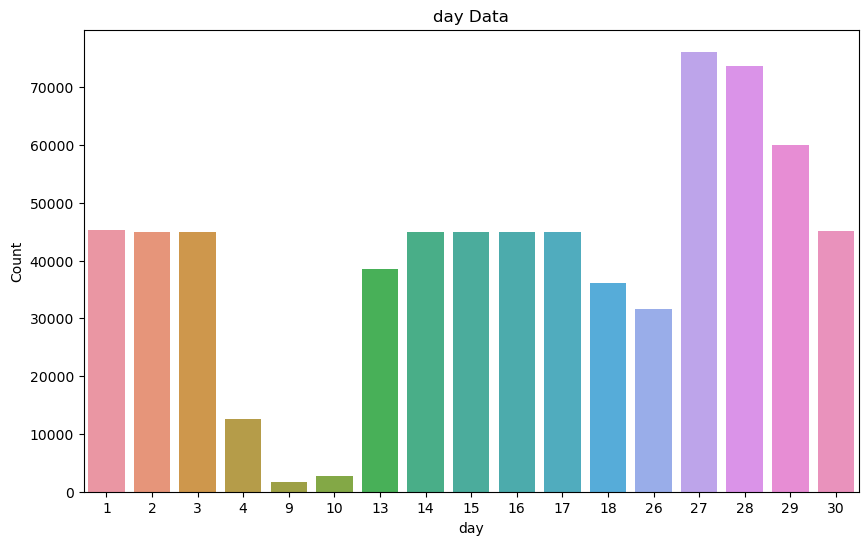

In [67]:
# Create Bar chart
calculate = data.groupby('day')['day'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=calculate.index, y=calculate.values)
plt.title('day Data')
plt.xlabel('day')
plt.ylabel('Count')
plt.show()

The data above shows a gap in the 'day' field. For example, there is no data for days 5 through 8.

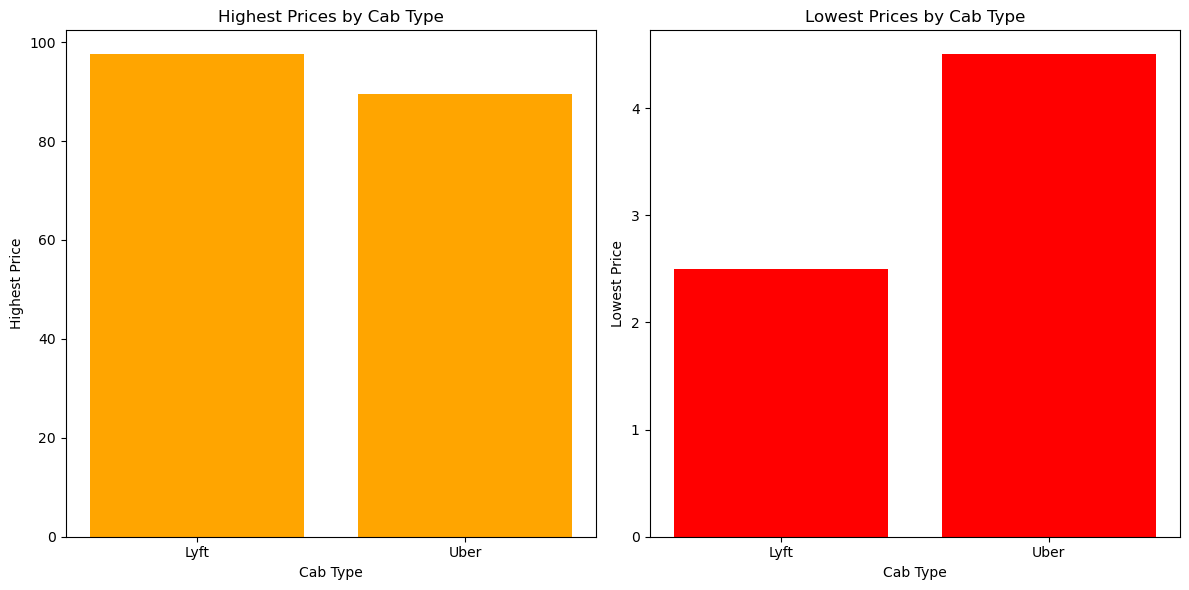

In [12]:
# Calculate the highest and lowest prices for each cab_type
highest_prices = data.groupby('cab_type')['price'].max()
lowest_prices = data.groupby('cab_type')['price'].min()

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(highest_prices.index, highest_prices.values, color='orange')
plt.title('Highest Prices by Cab Type')
plt.xlabel('Cab Type')
plt.ylabel('Highest Price')

plt.subplot(1, 2, 2)
plt.bar(lowest_prices.index, lowest_prices.values, color='red')
plt.title('Lowest Prices by Cab Type')
plt.xlabel('Cab Type')
plt.ylabel('Lowest Price')

plt.tight_layout()
plt.show()

The data above shows the percentage of highest and lowest prices compared to Lyft and Uber.

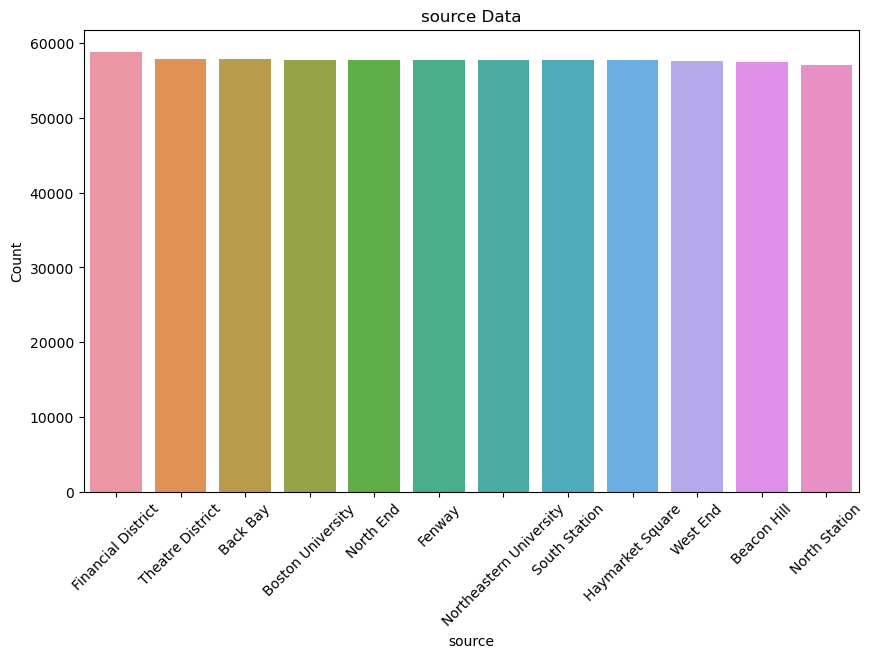

In [13]:
# Create Bar chart
calculate = data.groupby('source')['source'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=calculate.index, y=calculate.values)
plt.title('source Data')
plt.xlabel('source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

From the data above, it can be seen that all sources almost have the same values. All sources have 50k data for all source features.

## 5. Feature Engineering

Since we're going to perform regression, which is a supervised learning task, the data will be divided into features `X` and labels/targets `y`. Then, both datasets will also be split into a `train-set` and a `test-set`. Here's how you can proceed:

1. **Feature Engineering:**
   - Identify and select the features to be included in the dataset.
   - Perform data cleaning processes, such as removing missing entries or filling in missing values.
   - Encode categorical variables if necessary, for example, using techniques like one-hot encoding or label encoding.
   - Scale the features if needed, for example, using techniques like standardization or normalization.

2. **Data Splitting:**
   - Split the dataset into features (`X`) and labels (`y`).
   - Divide the dataset into a training set (`train-set`) and a testing set (`test-set`). Typically, around 70-80% of the data is used for training, and the rest is used for testing.
   - Ensure the splitting is done randomly to prevent bias in learning.


In [15]:
# Saving 1 random data from the original data to be used as inference data into the variable data_inf
data_inf = data.sample(1, random_state=0)

# Dropping the inference data from the main dataframe
data.drop(data_inf.index, inplace=True)

# Resetting the index for both data_inf and data
data.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# Dropping the target column in data_inf
data_inf.drop(['price'], axis=1, inplace=True)


save random data set `csv`

In [16]:
#simpan ke csv
data_inf.to_csv('data_inf')

### Splitting feature `X` and target `y`
Separating the label from the features

In [17]:
# split feature x & y
X= data.drop('price', axis=1)
y = data['price']

### Split train and test

Separating the dataset into two parts, namely the train set for training, and the test set for evaluation.

In [18]:
#Splitting between train set and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 3)

print('Train size : ', X_train.shape)
print('Test size : ', X_test.shape)
print('Train size : ', y_train.shape)
print('Test size : ', y_test.shape)

Train size :  (554455, 57)
Test size :  (138614, 57)
Train size :  (554455,)
Test size :  (138614,)


### Handling missing values

In this section, I will handle missing values found in the dataset after splitting. First, I will drop the `price`, `id`, and `timestamp` columns because these data do not have much influence.

In [19]:
#drop data
X = data.drop(['price', 'id', 'timestamp'], axis=1)
y = data.price
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [20]:
# cek missing value
y_train_na = y_train[y_train.isnull()==True]
y_test_na = y_test[y_test.isnull()==True]
print(y_train_na.shape)
print(y_test_na.shape)

(43935,)
(11160,)


In [21]:
# drop missing value
y_train = y_train.dropna()
y_test = y_test.dropna()

print('Size y_train : ', y_train.shape)
print('Size y_test  : ', y_test.shape)

Size y_train :  (510520,)
Size y_test  :  (127454,)


In [22]:
# Adjust the dropped data in y to X
X_train.drop(y_train_na.index, inplace=True)
X_test.drop(y_test_na.index, inplace=True)

In [23]:
# cek hasil
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(510520,)
(127454,)
(510520, 55)
(127454, 55)


### Handle Outliers

In this section, I will handle outliers. I choose to handle outliers in the `distance` feature because the parameter I am interested in is the relationship between `price` and `distance` as a benchmark for predicting the total price.

Firstly, before handling outliers, I will check its skewness to determine whether the data follows a normal distribution or a skewed distribution.

In [25]:
# Calculating the skewness of the 'distance' column in X_train
distance_skewness = skew(X_train['distance'])

print("Skewness of the 'distance' column:", distance_skewness)

Skewness of the 'distance' column: 0.8142548451514842


Based on the obtained skewness value indicating a highly skewed distribution, I'll handle it using the Interquartile Range (IQR) method. I'll set the threshold for the first quartile (Q1) to 0.25 and the third quartile (Q3) to 0.75.

In [26]:
# Calculate the first quartile (Q1) and the third quartile (Q3)
Q1 = X_train['distance'].quantile(0.25)
Q3 = X_train['distance'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calculate the number of outliers before removal
outlier_count_before = len(X_train[(X_train['distance'] < lower_bound) | (X_train['distance'] > upper_bound)])

# Remove outliers from X_train and y_train
X_train = X_train[(X_train['distance'] >= lower_bound) & (X_train['distance'] <= upper_bound)]
y_train = y_train.loc[X_train.index]

# Calculate the number of outliers after removal
outlier_count_after = len(X_train[(X_train['distance'] < lower_bound) | (X_train['distance'] > upper_bound)])

print("Number of outliers before removal:", outlier_count_before)
print("Number of outliers after removal:", outlier_count_after)


Number of outliers before removal: 5326
Number of outliers after removal: 0


Based on the above results, it can be seen that the total number of data containing outliers was 5316, and after handling, it became 0. Next, I will check the total number of overall data after handling outliers.

In [27]:
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(505194,)
(127454,)
(505194, 55)
(127454, 55)


### Feature Selection
Features that will be included in the model are selected based on their correlation with the target. In this section, we will remove (drop) features that have no influence on the target by checking their correlation.

Here's the general process:

1. Calculate the correlation between each feature and the target.
2. Determine a threshold for correlation strength (e.g., absolute correlation coefficient).
3. Drop features with correlation coefficients below the threshold.

Let's proceed with calculating the correlation coefficients between features and the target, and then drop features with low correlation coefficients.

### Checking Correlation for Feature Selection

Let's calculate the correlation coefficients between features and the target variable to perform feature selection.

In [28]:
# Split columns for efficient computation
set_1 = X_train.columns.tolist()[:11]
set_2 = X_train.columns.tolist()[11:22]
set_3 = X_train.columns.tolist()[22:33]
set_4 = X_train.columns.tolist()[33:44]
set_5 = X_train.columns.tolist()[44:54]

In [33]:
# Menonaktifkan peringatan
warnings.filterwarnings("ignore", message="The number of unique values of variable datetime is large")
warnings.filterwarnings("ignore", message="Not enough unique value for variable timezone for analysis")

# Menggabungkan data pelatihan (fitur dari set_1 dan target)
combined_train_data = pd.concat([X_train[set_1], y_train], axis=1)
combined_train_data.phik_matrix()['price']

interval columns not set, guessing: ['hour', 'day', 'month', 'distance', 'price']


hour           0.000000
day            0.000000
month          0.003199
datetime       0.000000
source         0.151299
destination    0.152226
cab_type       0.149228
product_id     0.685255
name           0.685255
distance       0.420148
price          1.000000
Name: price, dtype: float64

In [34]:
# Combining training data (features from set_2 and target)
combined_train_data = pd.concat([X_train[set_2], y_train], axis=1)
combined_train_data.phik_matrix()['price']


interval columns not set, guessing: ['surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'price']


surge_multiplier       0.372840
latitude               0.000000
longitude              0.000000
temperature            0.004184
apparentTemperature    0.003895
short_summary          0.000000
long_summary           0.000000
precipIntensity        0.000000
precipProbability      0.000000
humidity               0.000000
windSpeed              0.000000
price                  1.000000
Name: price, dtype: float64

Next, I will create a function to check correlation using `phik` and display it with a `heatmap` to examine data that has correlation values with the 'price' column.

In [35]:
# Function to plot heatmap
def plot_phik(column):
    combined_train_data = pd.concat([X_train[column], y_train], axis=1)
    phik_overview = combined_train_data.phik_matrix()

    plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(10,10))
    plt.tight_layout()
    return


interval columns not set, guessing: ['hour', 'day', 'month', 'distance', 'price']


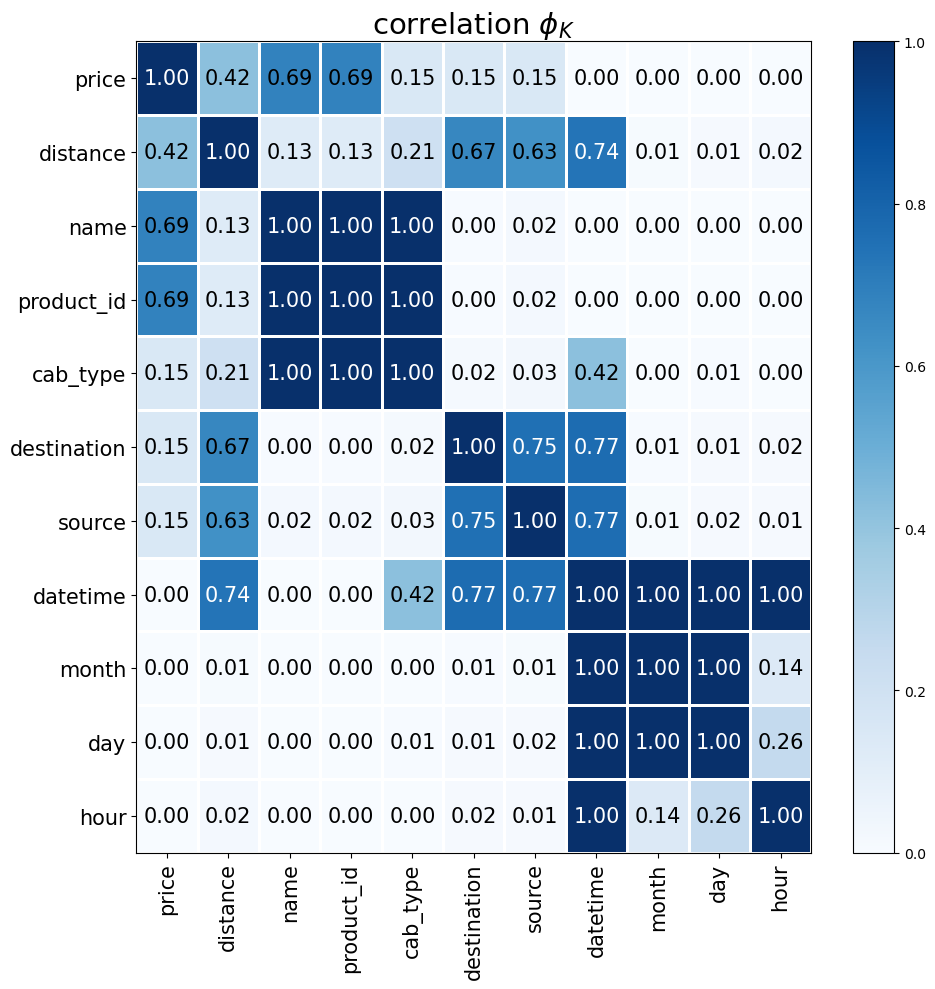

In [36]:
# Disabling warnings
warnings.filterwarnings("ignore", message="The number of unique values of variable datetime is large")
warnings.filterwarnings("ignore", message="Not enough unique value for variable timezone for analysis")
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

# Plotting
plot_phik(set_1)

interval columns not set, guessing: ['surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'price']


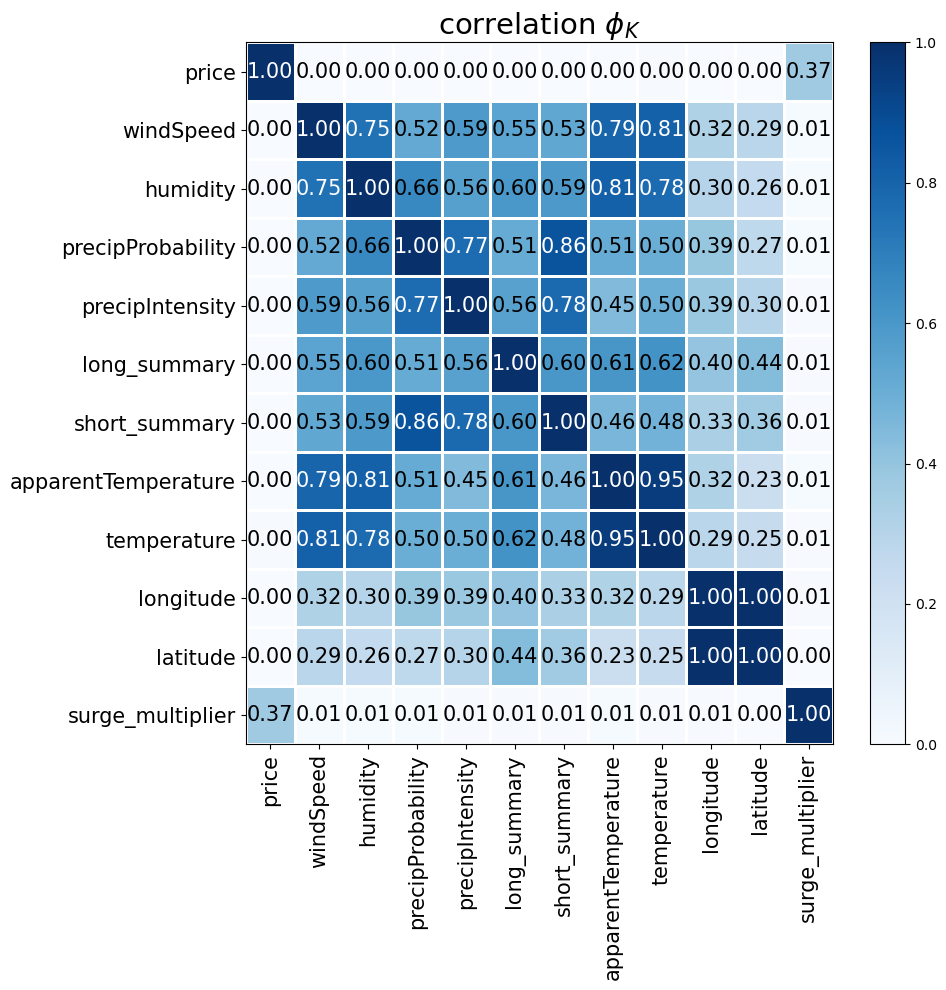

In [37]:
# Disabling warnings
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")
warnings.filterwarnings("ignore", message="Not enough unique value for variable timezone for analysis")

# Plotting
plot_phik(set_2)


interval columns not set, guessing: ['windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'price']


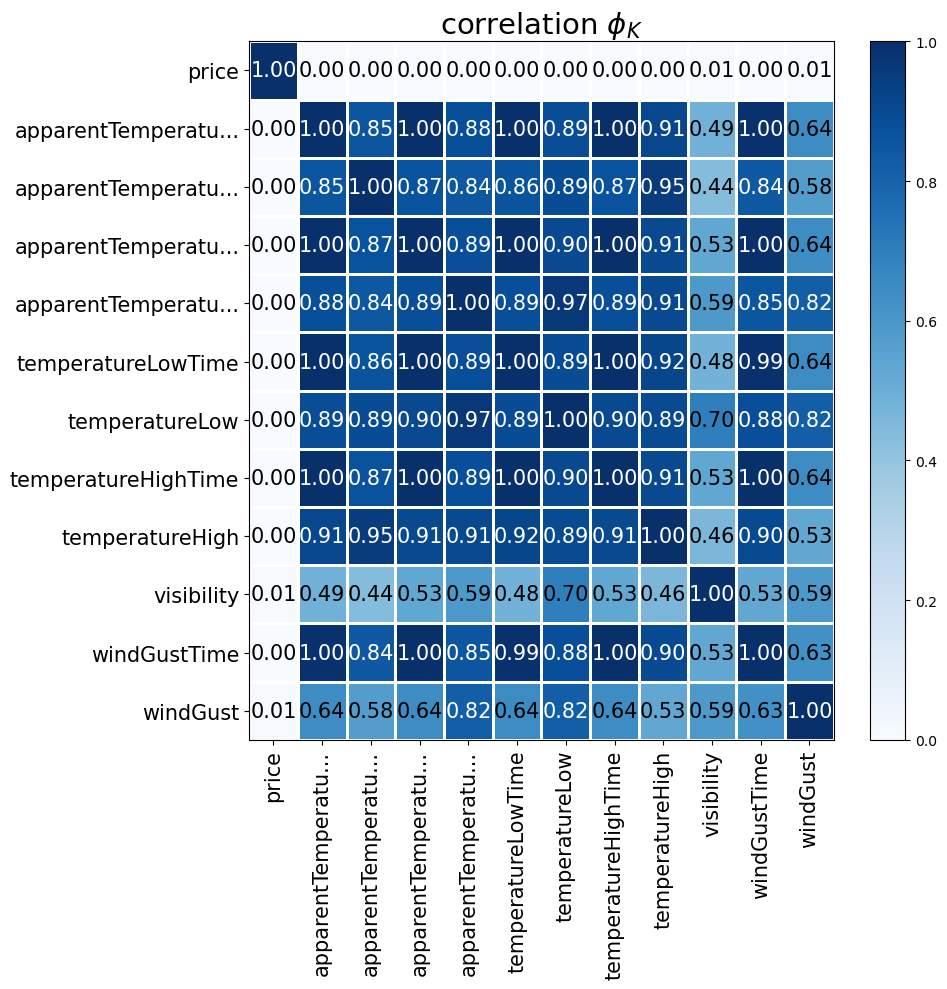

In [38]:
# Disabling warnings
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")
warnings.filterwarnings("ignore", message="Not enough unique value for variable timezone for analysis")

# Plotting
plot_phik(set_3)


interval columns not set, guessing: ['dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'price']


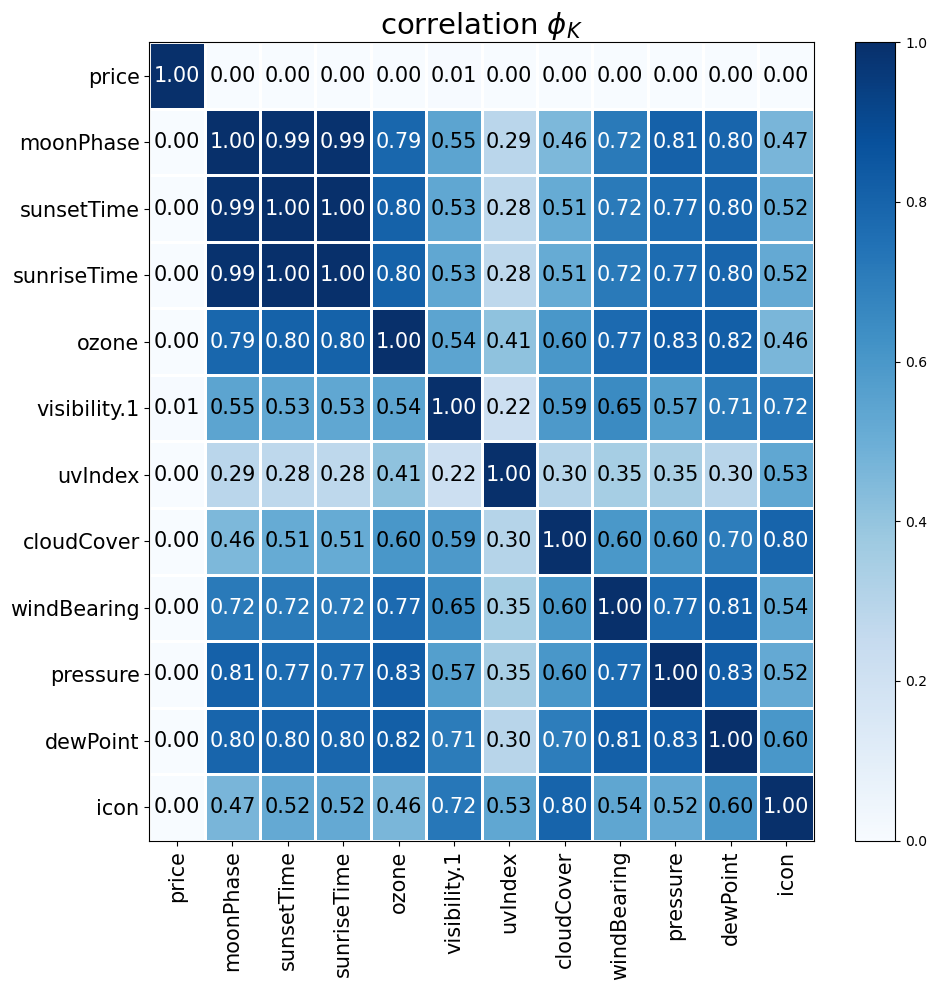

In [39]:
# Disabling warnings
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")
warnings.filterwarnings("ignore", message="Not enough unique value for variable timezone for analysis")

# Plotting
plot_phik(set_4)


interval columns not set, guessing: ['precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'price']


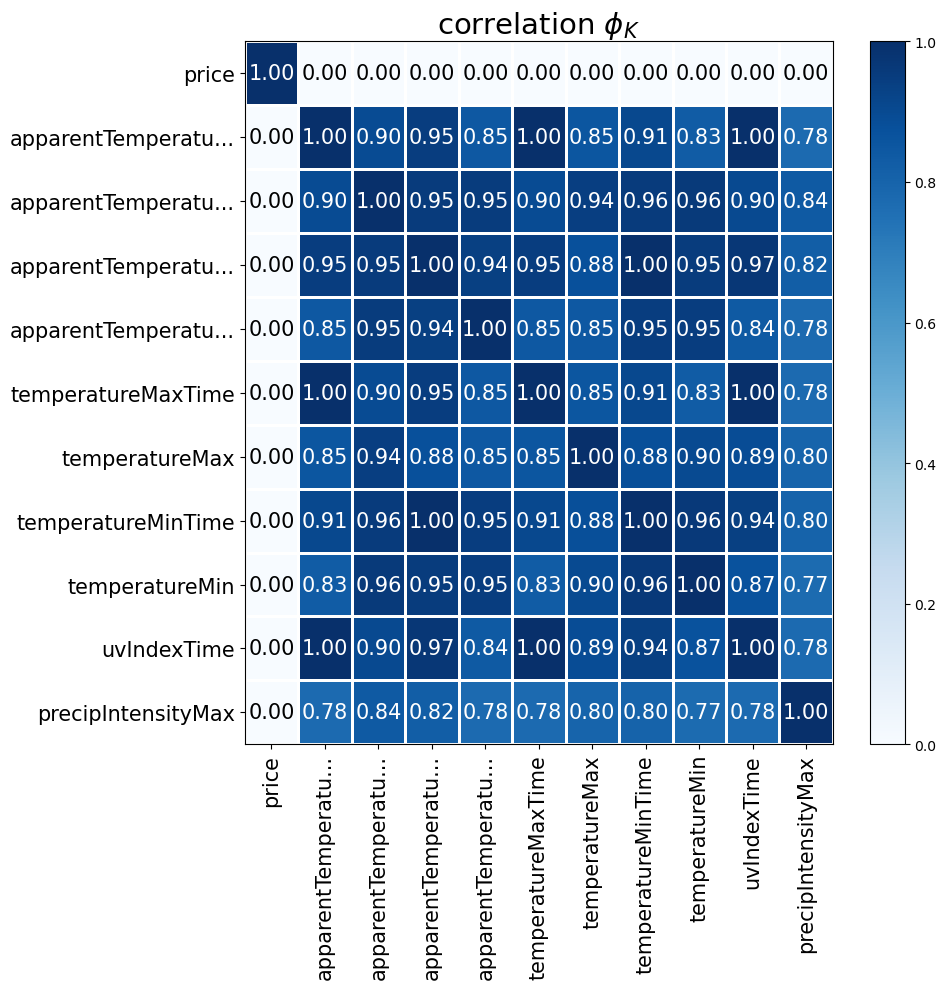

In [90]:
# Disabling warnings
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")
warnings.filterwarnings("ignore", message="Not enough unique value for variable timezone for analysis")

# Plotting
plot_phik(set_5)


"The features used are name, surge multiplier, and distance."

In [40]:
# New variable
features = ['name', 'surge_multiplier', 'distance']

In [42]:
# New variable to be included in X_train
X_train_features = X_train[features]
X_test_features = X_test[features]
X_train_features

,name,surge_multiplier,distance
213387,UberPool,1.0,0.72
58043,Shared,1.0,1.57
24924,UberXL,1.0,1.64
524711,Lyft XL,1.0,2.73
370039,Lyft,1.0,2.44
...,...,...,...
639432,Black,1.0,2.66
653672,Black,1.0,2.25
120705,Black,1.0,2.58
377541,UberXL,1.0,2.67


### Split numerical columns and categorical columns

Separating numerical and categorical columns.

In [43]:
# Separating numerical and categorical columns
X_train_num = X_train_features.select_dtypes(include=['float64', 'int64']).columns.tolist()
X_train_cat = X_train_features.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:")
print(X_train_num)
print("\nCategorical Columns:")
print(X_train_cat)

Numerical Columns:
['surge_multiplier', 'distance']

Categorical Columns:
['name']


### Check cardinality

Checking cardinality within the data

In [44]:
# cek cardinality 
num_cols = X_train_features.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train_features.select_dtypes(include=object).columns.tolist()

print(f'numerical columns   : {num_cols}')
print(f'categorical columns : {cat_cols}')

numerical columns   : ['surge_multiplier', 'distance']
categorical columns : ['name']


In [45]:
X_train[cat_cols].nunique()

name    12
dtype: int64

### Scaling

For scaling features, I will use `MinMaxScaler`. The reason I'm using `MinMaxScaler` is because it offers a simple approach as features will be transformed into values ranging from 0 to 1.

In [46]:
# Scaling using MinMaxScaler
scaler = MinMaxScaler()

X_train_num = X_train_features[num_cols]
X_test_num = X_test_features[num_cols]

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)


In [47]:
print("X_train_num_scaled:")
print(X_train_num_scaled)

print("\nX_test_num_scaled:")
print(X_test_num_scaled)

X_train_num_scaled:
[[0.         0.12962963]
 [0.         0.28703704]
 [0.         0.3       ]
 ...
 [0.         0.47407407]
 [0.         0.49074074]
 [0.         0.32037037]]

X_test_num_scaled:
[[0.         0.26111111]
 [0.         0.24444444]
 [0.         0.63333333]
 ...
 [0.         1.27592593]
 [0.         0.18148148]
 [0.         0.56481481]]


### Encoding

In [48]:
# Initializing encoder
encoder = OneHotEncoder(handle_unknown='ignore')

X_train_cat = X_train_features[cat_cols]
X_test_cat = X_test_features[cat_cols]

# Performing one-hot encoding on categorical data for X_train and X_test
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)


In [49]:
print("X_train_num_scaled:")
print(X_train_cat_encoded)

print("\nX_test_num_scaled:")
print(X_test_cat_encoded)

X_train_num_scaled:
  (0, 8)	1.0
  (1, 7)	1.0
  (2, 10)	1.0
  (3, 6)	1.0
  (4, 5)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 9)	1.0
  (8, 5)	1.0
  (9, 2)	1.0
  (10, 9)	1.0
  (11, 6)	1.0
  (12, 11)	1.0
  (13, 11)	1.0
  (14, 0)	1.0
  (15, 6)	1.0
  (16, 0)	1.0
  (17, 10)	1.0
  (18, 7)	1.0
  (19, 7)	1.0
  (20, 0)	1.0
  (21, 9)	1.0
  (22, 5)	1.0
  (23, 6)	1.0
  (24, 9)	1.0
  :	:
  (505169, 6)	1.0
  (505170, 5)	1.0
  (505171, 0)	1.0
  (505172, 0)	1.0
  (505173, 4)	1.0
  (505174, 1)	1.0
  (505175, 3)	1.0
  (505176, 7)	1.0
  (505177, 6)	1.0
  (505178, 6)	1.0
  (505179, 7)	1.0
  (505180, 9)	1.0
  (505181, 7)	1.0
  (505182, 11)	1.0
  (505183, 9)	1.0
  (505184, 3)	1.0
  (505185, 2)	1.0
  (505186, 10)	1.0
  (505187, 1)	1.0
  (505188, 10)	1.0
  (505189, 0)	1.0
  (505190, 0)	1.0
  (505191, 0)	1.0
  (505192, 10)	1.0
  (505193, 5)	1.0

X_test_num_scaled:
  (0, 2)	1.0
  (1, 9)	1.0
  (2, 1)	1.0
  (3, 2)	1.0
  (4, 2)	1.0
  (5, 9)	1.0
  (6, 9)	1.0
  (7, 6)	1.0
  (8, 6)	1.0
  (9, 11)	1.0
  (10, 4)	1.0
  (11, 4)	1

### Concate columns

In [51]:
# Combine scaled numerical features and encoded categorical features
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded.toarray()], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded.toarray()], axis=1)

# Create pandas DataFrame from the generated arrays, giving column names according to the encoder
X_train_final = pd.DataFrame(X_train_final, columns=num_cols + list(encoder.get_feature_names_out()))
X_test_final = pd.DataFrame(X_test_final, columns=num_cols + list(encoder.get_feature_names_out()))

X_train_final

,surge_multiplier,distance,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.0,0.129630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.287037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.501852,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.448148,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505189,0.0,0.488889,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505190,0.0,0.412963,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505191,0.0,0.474074,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505192,0.0,0.490741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Feature engineering is finished up to this point. Proceed with fitting the features into the model.

## 6. Model Definition
The algorithm chosen for this model is linear regression. Linear Regression is selected for several reasons:

1. **Simple and Easy to Interpret**: Linear Regression is one of the simplest algorithms and easy to interpret.

2. **Ability to Handle Linear Relationships**: Linear Regression is suitable for cases where the relationship between independent and dependent variables is assumed to be linear.

3. **Efficient Computation**: The Linear Regression model has a fast and efficient training process, especially on datasets with a relatively small number of features.

4. **Interpretation of Coefficients**: Linear Regression provides coefficients that are directly interpretable for each independent variable, allowing evaluation of their impact on the target variable.

## 7.Model Training

In [52]:
##Trainig using Linear Regression
model_lin_reg = LinearRegression()

In [53]:
model_lin_reg.fit(X_train_final,y_train)

LinearRegression()

## 8. Model Evaluation
Perform evaluation on both the train and test sets to determine whether the model is overfitting, underfitting, or a good fit.

In [54]:
# Predict Train-set and Test-set

y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)
y_pred_train

array([ 4.6875    ,  4.27355957, 14.12219238, ..., 21.54248047,
       17.06054688,  7.67822266])

### Model evaluation using MAE

In [55]:
# Make predictions for the training and test data
y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)

# Evaluate the model using MAE
print('Error - Train set:', mean_absolute_error(y_train, y_pred_train))
print('Error - Test set:', mean_absolute_error(y_test, y_pred_test))

Error - Train set: 1.7438415958557656
Error - Test set: 1.7810150571250827


MAE is an evaluation metric that measures the average absolute difference between predictions and actual values. The lower the MAE value, the better the model's performance in making predictions. From the values you provided:
* the model is considered a good fit.
* With MAE around 1.743 for the training data and 1.781 for the test data, the model demonstrates the ability to predict target values with an average error of around 1.78 units. This indicates that the model performs well in handling prediction tasks; however, further evaluation and contextualization in the specific business application are still necessary to comprehensively assess the added value provided by this model.

In [56]:
print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test))

R2 Score - Train Set :  0.9296566909348257
R2 Score - Test Set  :  0.9269237847609335


R2 Score is an evaluation metric that measures how well the regression model fits the data, with values ranging between 0 and 1. From the obtained values:
- The R2 Score for the Train set is approximately 0.92.
- The R2 Score for the Test set is approximately 0.92.

Both of these values indicate that the model has a good ability to explain the variation in the data, both in the Train set and the Test set. This suggests that the model can generalize well from the training data to new, unseen data (the test data).

## 9. Save Model
Saving the finalized model is done to preserve the trained model for future use in an application.

In [57]:
#Save the files

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_cols, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_cols, file_2)

with open('model_scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('model_encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('model_lin_reg.pkl', 'wb') as file_5:
  pickle.dump(model_lin_reg, file_5)

The model has been saved in the form of a pickle file (.pkl).

## 10. Conclusion

Based on the data analysis results, I can summarize several key findings from the EDA:

1. Price Distribution: The price distribution in the dataset tends to be skewed to the left, with the majority of prices clustered in the lower price range, particularly between 0 and 20.

2. Price Variation by Group Name: There is significant variation in prices between different group names. Some group names have higher prices and some have lower prices.

3. Observations on Month and Day Data: The data in the dataset only covers the months of November and December. Additionally, there is a gap in the 'day' data where no data is available for days 5 through 8.

4. Highest and Lowest Price Percentages: The highest price percentage for 'Lyft' and the lowest price percentage for 'Uber' can be calculated based on the total price of each service type.

5. Data Consistency in the Source Feature: From observations, each source feature has almost the same amount of data, around 50,000 data points. This indicates consistency in the amount of data collected from each source.

Thus, understanding these data characteristics can provide valuable insights into understanding trends, variability, and tendencies in the dataset. This information can be used for better decision-making in various contexts, such as pricing settings, operational planning, and market analysis.

#### Linear Relationship

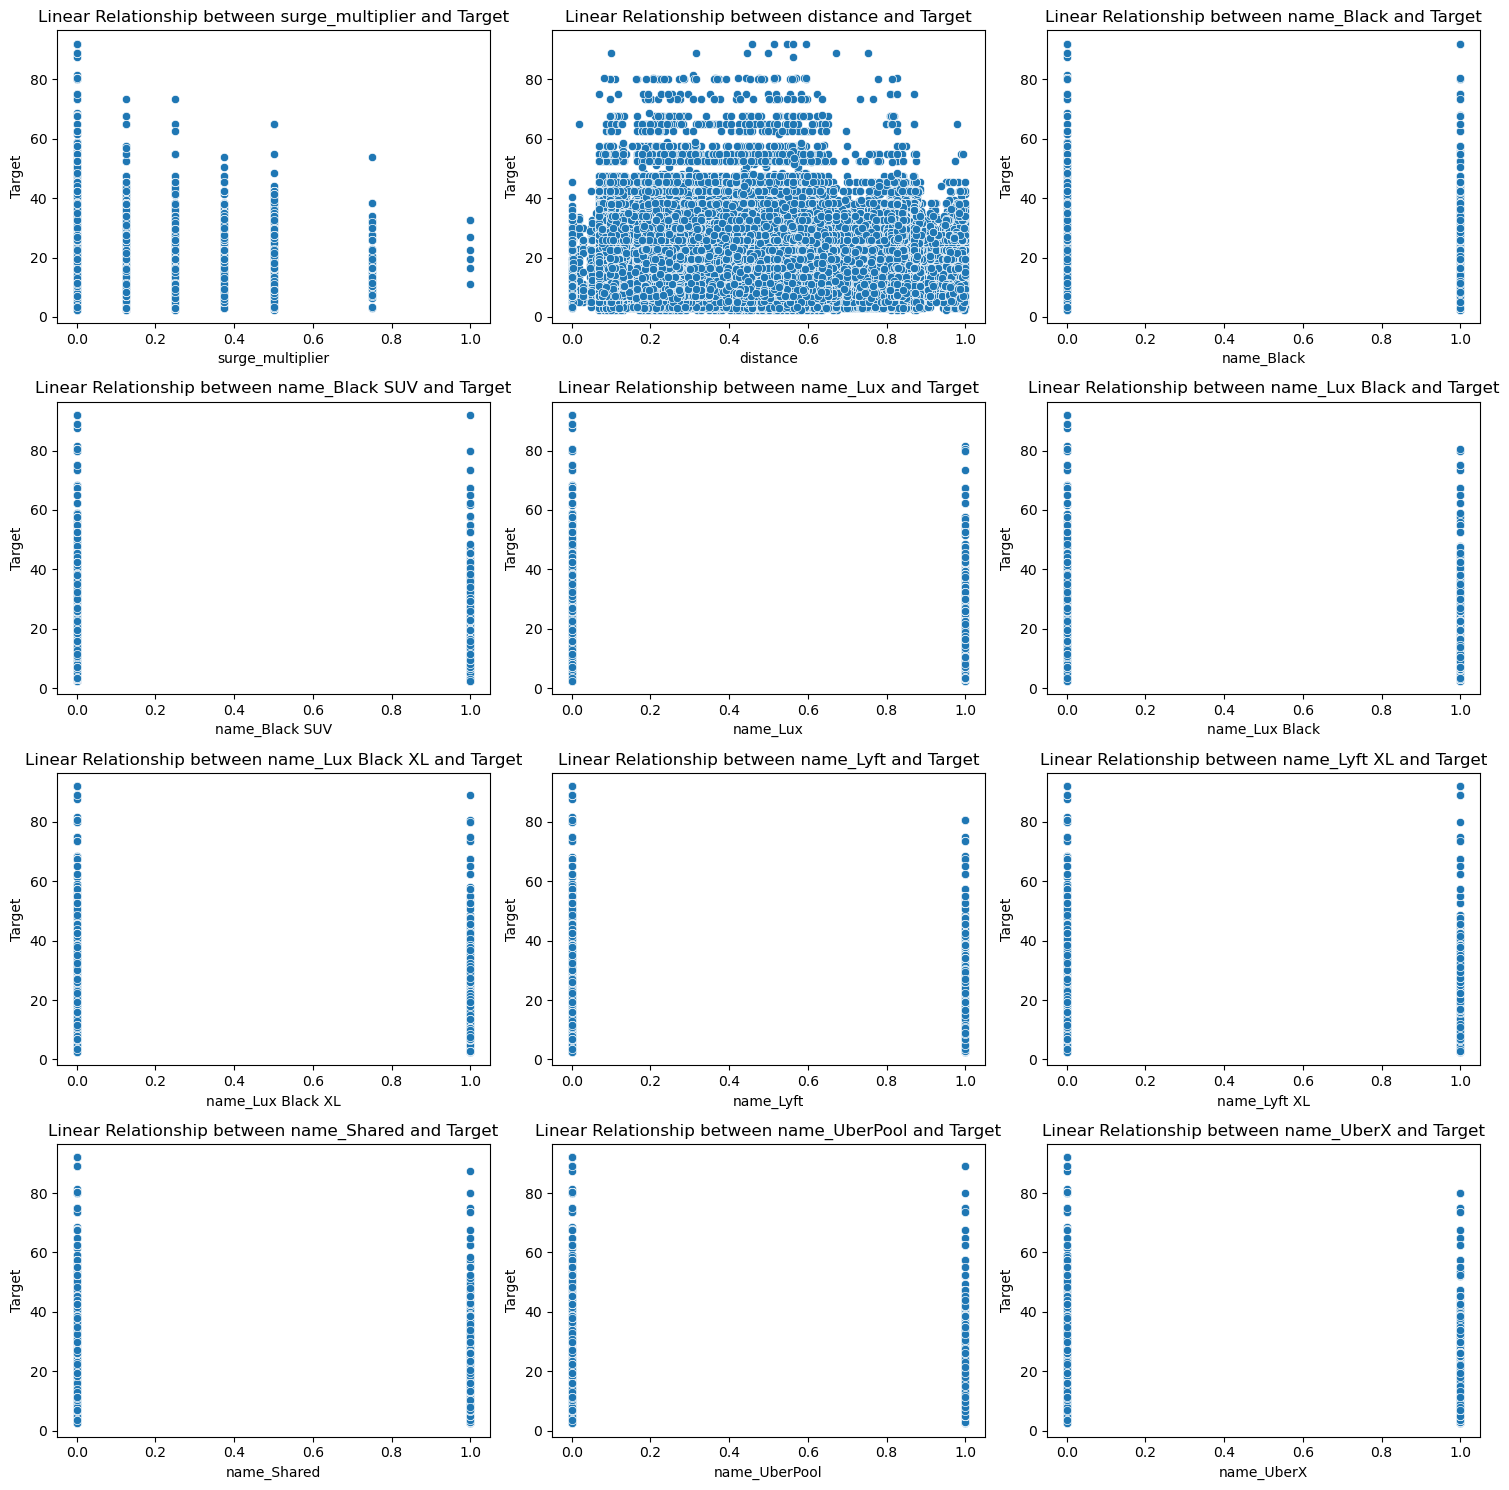

In [58]:
# Determining the size of the figure and grid
num_rows = 4
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Creating scatter plots for each feature in X_train_feature
for i, ax in enumerate(axes.flatten()):
    if i < len(X_train_final.columns):
        sns.scatterplot(x=X_train_final.iloc[:, i], y=y_train, ax=ax)
        ax.set_title(f'Linear Relationship between {X_train_final.columns[i]} and Target')
        ax.set_xlabel(X_train_final.columns[i])
        ax.set_ylabel('Target')
    else:
        ax.axis('off')  # Deactivating unused subplot

# Adjusting layout and displaying plot
plt.tight_layout()
plt.show()


Assumptions of Linear Regression:

1. **Linear Relationship**: The independent and dependent variables have a linear relationship. Changes in the independent variable result in proportional changes in the dependent variable.

2. **Independence of Residuals**: Residuals (the difference between observed and predicted values) are independent of each other and do not exhibit any patterns. There is no correlation among residuals.

3. **Homoscedasticity**: The variance of residuals remains constant across all predicted values. There is no pattern in the distribution of residuals as the predicted values change.

4. **No Multicollinearity**: There is no perfect linear relationship among two or more independent variables. This avoids issues in estimating regression coefficients and difficult interpretation.

5. **Normality of Residuals**: Residuals follow a normal distribution. Most residual values are centered around zero and have a symmetrical distribution.

6. **No Outliers**: There are no significant observations deviating from the general pattern in the data. Outliers can have a significant impact on the model outcomes and result in biased parameter estimates.

#### slope dan intercept

In [59]:
slope = model_lin_reg.coef_
intercept = model_lin_reg.intercept_

print("Nilai Slope (Koefisien Regresi): ", slope)
print("Nilai Intercept: ", intercept)


Nilai Slope (Koefisien Regresi):  [ 3.67723815e+01  1.54045471e+01 -5.84799475e+11 -5.84799475e+11
 -5.84799475e+11 -5.84799475e+11 -5.84799475e+11 -5.84799475e+11
 -5.84799475e+11 -5.84799475e+11 -5.84799475e+11 -5.84799475e+11
 -5.84799475e+11 -5.84799475e+11]
Nilai Intercept:  584799474820.2756


From the slope and intercept data above, having very large magnitudes can indicate that the model did not properly normalize or scale the features before training the model.

## Model Analysis

Based on the Mean Absolute Error (MAE) and R2 Score values obtained, the model's performance is as follows:

1. **Mean Absolute Error (MAE)**:
   * Train Set: 1.74
   * Test Set: 1.78
   MAE is an evaluation metric that measures the average absolute difference between predictions and actual values. A lower MAE indicates better model performance. In this case, the low MAE values indicate that the model tends to make accurate predictions, both for the training and test data.

2. **R2 Score**:
   * Train Set: 0.92
   * Test Set: 0.92
   R2 Score measures how well the variability of the target is explained by the features in the model. The R2 Score ranges from 0 to 1, where values closer to 1 indicate a better model in explaining data variability. In this case, the high R2 Score values indicate that the model has a good ability to explain price variability.

Based on these results, the regression model appears to have good performance with low MAE values and high R2 Score values for both the training and test data. This suggests that the model is capable of providing accurate predictions and has a good ability to explain price variations. However, make sure to validate and test the model with a larger and more diverse dataset to ensure the reliability and generalization of the model.

## Advantages & Disadvantages

### Advantages of Regression Model:
1. Clear understanding of the relationship between variables.
2. Stable and consistent predictions for new data if the data representation is good.
3. Can identify variables that have a significant impact on the target variable.

### Disadvantages of Regression Model:
1. The model assumes a linear relationship between variables, which may not always be the case.
2. Vulnerable to disruption by outliers, which can affect prediction accuracy.
3. Requires conversion of categorical variables into numerical form, which can lead to information loss or bias.

## Improvement

To improve the regression model that has been created, here are some further recommendations for enhancement:

1. Use of more specific Additional Features.

2. More in-depth Outlier Handling for the data.

3. Hyperparameter Optimization to find more optimal combinations.

4. Data Collection Enhancement.

5. More In-depth Analysis.

By implementing these recommendations, we can improve the performance and reliability of the regression model, thus providing greater added value in the business context faced.

## Overall Analysis

In the overall analysis, the created regression model demonstrates good performance with low MAE and high R2 Score for both the training and test data. However, there are still some areas that need improvement to make the model better and more efficient in its program execution.